# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header = 0)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

In [5]:
list(df.columns)

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'cal

1. Airbnb NYC "listings"
2. Whether an Airbnb is instantly bookable; label = instant_bookable
3. This is a supervised learning problem since we have a labeled target and binary classification problem as the model will predict one of two classes: whether the airbnb listed is instant bookable or not
4. host_is_superhost, host_response_rate, host_acceptance_rate, host_listings_count, room_type, accommodates, bedrooms, beds, amenities, price, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, review_scores_rating, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month
5.  It will help improve booking experience for users by allowing Airbnb to prioritize and recommend listings that offer faster, hassle-free reservations. This will in turn especially be popular among users who prefer convenience and speed.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [7]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [8]:
df.shape

(28022, 50)

by just looking at the first five rows, there are noticable missing values (NaN) that need to be adressed as well as columns that contain string values that need to be one-hot encoded.

In [21]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [22]:
nan_detected = np.sum(df.isnull(), axis = 0) != 0
nan_detected

name                                             True
description                                      True
neighborhood_overview                            True
host_name                                       False
host_location                                    True
host_about                                       True
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                        

In [23]:
is_int_or_float =(df.dtypes == 'int64') | (df.dtypes == 'float64')
is_int_or_float

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                              True
host_total_listings_count                        True
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                     True
bathrooms                                        True
bedrooms                                         True
beds                        

features with integer or float values that contain missing values should be replaced with means

features with string datatype that need to be one-hot encoded:

In [25]:
to_encode = list(df.select_dtypes(include=['object']).columns)
df[to_encode].nunique()

name                            27386
description                     25952
neighborhood_overview           15800
host_name                        7566
host_location                    1364
host_about                      11962
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

name, description, neighborhood_overview, host_name, host_location, host_about, amenities have too many values to be one-hot encoded and they would be adding too much noise as well and thus should be dropped

In [26]:
columns_to_drop = [
    'name', 
    'description', 
    'neighborhood_overview', 
    'host_name', 
    'host_location', 
    'host_about', 
    'amenities'
]
df.drop(columns=columns_to_drop, inplace=True)

In [28]:
to_encode = list(df.select_dtypes(include=['object']).columns)
df[to_encode].nunique()

neighbourhood_group_cleansed    5
room_type                       4
dtype: int64

neighbourhood_group_cleansed and room_type can be one-hot encoded

since this is a binary classification problem, logistic regression model can be used. model can be prone to be over/underfitting so the hyperparameter has to be tuned.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

In [66]:
#features kept:
print(str(list(df.columns)))

['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'n_host_verifications', 'host_respon

one-hot encoding and handling missing data needs to be done to prepare the dataset

the price and number_of_reviews can also be normalized so that they are on a similar scale for logistic regression.  The dataset will be split for training and testing, and scikit-learn can be used to find the optimal hyperparameter.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [37]:
from sklearn.preprocessing import OneHotEncoder 

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

In [107]:
from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [33]:
#handle missing data
nan_detected = np.sum(df.isnull(), axis = 0) != 0
is_int_or_float =(df.dtypes == 'int64') | (df.dtypes == 'float64')
to_impute = nan_detected & is_int_or_float
df.columns[to_impute]

Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds'], dtype='object')

In [34]:
to_impute_selected = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']
for col in to_impute_selected:
    df[col + '_na'] = df[col].isnull()
#replace misisng values with its mean
for col in to_impute_selected:
    mean = df[col].mean()
    df[col].fillna(value = mean, inplace = True)
#verify
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0
beds missing values count :0


In [45]:
#one-hot encode

In [38]:
to_encode = list(df.select_dtypes(include=['object']).columns)
enc = OneHotEncoder(sparse_output = False)
df_enc = pd.DataFrame(enc.fit_transform(df[to_encode]), columns=enc.get_feature_names_out(to_encode))

In [39]:
df_enc.head()

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
df_enc.columns = enc.get_feature_names_out(['neighbourhood_group_cleansed', 'room_type'])

In [42]:
df_enc.head(10)

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
df = df.drop(columns=['neighbourhood_group_cleansed', 'room_type'])

In [48]:
#check if data is prepared.

In [49]:
nan_detected = np.sum(df.isnull(), axis = 0) != 0
nan_detected

host_response_rate                              False
host_acceptance_rate                            False
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
accommodates                                    False
bathrooms                                       False
bedrooms                                        False
beds                                            False
price                                           False
minimum_nights                                  False
maximum_nights                                  False
minimum_minimum_nights                          False
maximum_minimum_nights                          False
minimum_maximum_nights                          False
maximum_maximum_nights                          False
minimum_nights_avg_ntm      

In [51]:
list(df.select_dtypes(include=['object']).columns)

[]

In [65]:
list[df.columns]

list[Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_priv

In [67]:
y = df['instant_bookable']
X = df.drop(columns = 'instant_bookable', axis = 1)
X.head()
list(X.columns)

['host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'n_host_verificat

In [68]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = .10, random_state=1234)

In [69]:
model_default = LogisticRegression(max_iter=1000)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [70]:
# test model
proba_predictions_default = model_default.predict_proba(X_test)[:, 1]
class_label_predictions_default = model_default.predict(X_test)

In [71]:
#evaluate accuracy
print('Confusion Matrix for the model: ')

c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])

pd.DataFrame(
c_m,
columns=['Predicted: Instant Bookable', 'Predicted: Not Instant Bookable'],
    index=['Actual: Instant Bookable', 'Actual: Not Instant Bookable']
)

Confusion Matrix for the model: 


,Predicted: Instant Bookable,Predicted: Not Instant Bookable
Actual: Instant Bookable,27,754
Actual: Not Instant Bookable,6,2016


Model has a high accuracy for predicting Not Instant Bookable and a poor accuracy for predicting Instant Bookable. Due to this imbalance, optimal choice of hyperparameter needs to be found and balancing techniques need to be implemented. 

In [92]:

cs = [10**i for i in range(-5, 5)]
param_grid = {'C': cs}

print("Running Grid Search...")

# balanced class weight for imbalance, and solver='liblinear' for small datasets or high regularization
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')
grid_search = grid.fit(X_train_scaled, y_train)

print("Done")

best_C = grid_search.best_estimator_.C
print("Best C:", best_C)

Running Grid Search...
Done
Best C: 1


In [97]:
model_best = LogisticRegression(max_iter=1000, C= best_C)
model_best.fit(X_train, y_train)
# 1. Make predictions on the test data using the predict_proba() method
proba_predictions_best = model_best.predict_proba(X_test)[:, 1]

# 2. Make predictions on the test data using the predict() method
class_label_predictions_best = model_best.predict(X_test)

# Display a confusion matrix
print('Confusion Matrix for the model: ')

c_m = confusion_matrix(y_test, class_label_predictions_best, labels=[True, False])

pd.DataFrame(
c_m,
columns=['Predicted: Instant Bookable', 'Predicted: Not Instant Bookable'],
    index=['Actual: Instant Bookable', 'Actual: Not Instant Bookable']
)

Confusion Matrix for the model: 


,Predicted: Instant Bookable,Predicted: Not Instant Bookable
Actual: Instant Bookable,27,754
Actual: Not Instant Bookable,6,2016


since there was no difference after finding hyperparameter c, it was likely due to features not scaled properly

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Fit the model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Predict using scaled test data
proba_predictions = model.predict_proba(X_test_scaled)[:, 1]
class_label_predictions = model.predict(X_test_scaled)

# Evaluate accuracy
print('Confusion Matrix for the model: ')
c_m = confusion_matrix(y_test, class_label_predictions, labels=[True, False])

# Display confusion matrix as DataFrame
pd.DataFrame(
    c_m,
    columns=['Predicted: Instant Bookable', 'Predicted: Not Instant Bookable'],
    index=['Actual: Instant Bookable', 'Actual: Not Instant Bookable']
)

Confusion Matrix for the model: 


,Predicted: Instant Bookable,Predicted: Not Instant Bookable
Actual: Instant Bookable,577,204
Actual: Not Instant Bookable,733,1289


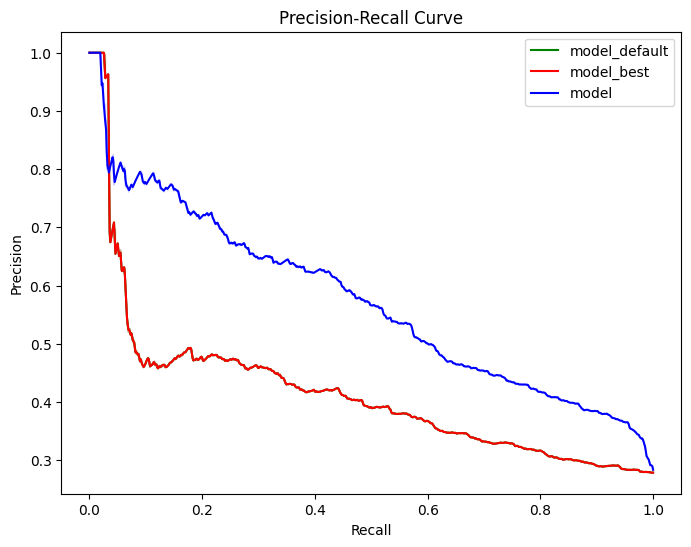

In [110]:

precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)
precision_model, recall_model, thresholds_model = precision_recall_curve(y_test, proba_predictions)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

sns.lineplot(x=recall_default, y=precision_default, color='g', label='model_default')
sns.lineplot(x=recall_best, y=precision_best, color='r', label='model_best')
sns.lineplot(x=recall_model, y=precision_model, color='b', label='model')

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

The final model is a bit more accurate now as it is capturing much more actual instant bookable listings from 27 to 577, but it is now predicting a lot more false positives which is 727 more than before. 